<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/inside-deep-learing/01-foundational-methods/02_automatic_differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Automatic differentiation

In [1]:
import torch

import numpy as np
import pandas as pd

import timeit

from tqdm.autonotebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

Say we have the function $f(x)=(x - 2)^2$.

Let’s define it and plot what the function looks like:

In [2]:
def f(x):
  return torch.pow((x - 2.0), 2)

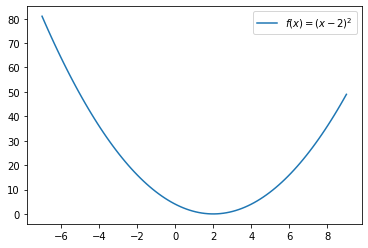

In [3]:
x_values = np.linspace(-7, 9, 100)
y_values = f(torch.tensor(x_values)).numpy()

sns.lineplot(x=x_values, y=y_values, label="$f(x)=(x - 2)^2$")

##Using derivatives to minimize losses

In [4]:
# let's defines the derivative of f(x) manually
def fp(x):
  return 2 * x - 4

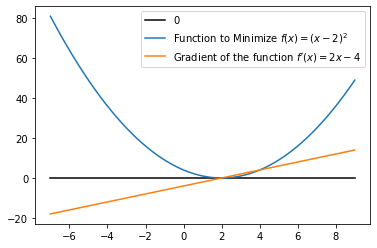

In [5]:
y_value_p = fp(torch.tensor(x_values)).numpy()

sns.lineplot(x=x_values, y=[0.0] * len(x_values), label="0", color="black")
sns.lineplot(x=x_values, y=y_values, label="Function to Minimize $f(x) = (x-2)^2$")
sns.lineplot(x=x_values, y=y_value_p, label="Gradient of the function $f'(x) = 2x-4$")

##Calculating a derivative with automatic differentiation

In [8]:
# let's keep track of the gradient
x = torch.tensor([-3.5], requires_grad=True)
# it does not exist yet since we haven’t computed anything
print(x.grad)

None


In [9]:
# let’s try computing it
value = f(x)
print(value)

tensor([30.2500], grad_fn=<PowBackward0>)


In [10]:
# let's compute the gradients
value.backward()
print(x.grad)

tensor([-11.])


##Putting it together: Minimizing a function with derivatives